
![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
import random  as random
%matplotlib inline

In [5]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


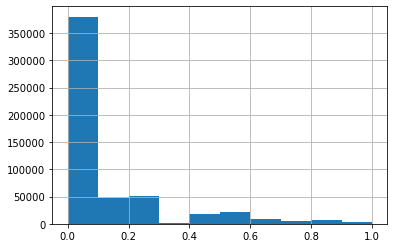

In [53]:
# Impresión histograma de variable de interés (y)
df.target.hist()

Debido a las limitaciones de nuestros computadores, se hace un muestreo aleatorio simple (MAS) en la base original, para realizar el ejercicio y reducir el tiempo y el costo computacional de la ejecución, además se decide trabajar con 800 el parametro de max_features en los tres modelos ejecutados ya que este número nos daba resultados aceptables y no es tan costoso. 

In [6]:
df_muestra = df.sample(n = 100000, random_state = 1)

In [7]:
# Separación de variable de interés (y)
y = df_muestra.target
y.describe()

count    100000.000000
mean          0.103115
std           0.197427
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [8]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df_muestra.comment_text

In [9]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [59]:
# Vamos a volver todos los datos en minuscula, vamos a quitar palabras en ingles tipo and, them. 
## tambien vamos a ignorar errores del encoding, quitaremos signos de punturacion y esas cosas debido a que estamos en ingles y eso seria un error
# agregamos el parametro max_features que limita la cantidad de palabras a usar, en este caso colocaremos 8000
vect_A = CountVectorizer(lowercase=True, decode_error='ignore', strip_accents='ascii', max_features = 800, stop_words='english')
X_dtm_A = vect_A.fit_transform(X_train)
X_dtm_A_test = vect_A.transform(X_test)

In [60]:
# Impresión dimensiones de matriz de documentos donde las filas son documentos y las columnas son términos o tokens
X_dtm_A.shape

(67000, 800)

In [61]:
print(vect_A.get_feature_names()[-200:-100])

['risk', 'road', 'room', 'rule', 'rules', 'run', 'running', 'russia', 'russian', 'sad', 'safe', 'safety', 'said', 'sales', 'save', 'saw', 'say', 'saying', 'says', 'school', 'schools', 'science', 'second', 'sector', 'security', 'seen', 'self', 'sell', 'senate', 'sense', 'seriously', 'service', 'services', 'set', 'sex', 'sexual', 'share', 'short', 'shot', 'shouldn', 'shows', 'similar', 'simple', 'simply', 'single', 'situation', 'small', 'social', 'society', 'solution', 'soon', 'sorry', 'sort', 'sound', 'sounds', 'source', 'south', 'speak', 'special', 'speech', 'spend', 'spending', 'spent', 'staff', 'stand', 'start', 'started', 'state', 'statement', 'states', 'stay', 'step', 'stop', 'story', 'street', 'strong', 'students', 'study', 'stuff', 'stupid', 'subject', 'suggest', 'support', 'supporters', 'supposed', 'sure', 'taken', 'takes', 'taking', 'talk', 'talking', 'tax', 'taxes', 'taxpayers', 'team', 'tell', 'term', 'thank', 'thanks', 'thing']


In [62]:
# Celda 4
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Definición de modelo Random Forest para un problema de clasificación
modelo_rf = RandomForestRegressor()
# Predicción y desempeño al hacer votación mayoritaria
modelo_rf.fit(X_dtm_A, y_train)
y_pred = modelo_rf.predict(X_dtm_A_test)

modelo1 = metrics.mean_squared_error(y_test, y_pred)
print(metrics.mean_squared_error(y_test, y_pred)) 

0.03833294814013485


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [63]:
# Celda 2
# Vamos a volver todos los datos en minuscula, vamos a quitar palabras en ingles tipo and, them. 
## tambien vamos a ignorar errores del encoding, quitaremos signos de punturacion y esas cosas debido a que estamos en ingles y eso seria un error
# agregamos el parametro min_df para quitar las palabras que se repiten menos de 10 veces en el analisis 
vect_B = CountVectorizer(lowercase = True, decode_error = 'ignore', strip_accents = 'ascii',  stop_words = 'english', ngram_range=(1, 3),
                        max_features = 800)
X_dtm_B = vect_B.fit_transform(X_train)
X_dtm_B_test = vect_B.transform(X_test)


In [64]:
# Impresión dimensiones de matriz de documentos donde las filas son documentos y las columnas son términos o tokens
X_dtm_B.shape

(67000, 800)

In [65]:
print(vect_B.get_feature_names()[-200:-100])

['risk', 'road', 'room', 'rule', 'rules', 'run', 'running', 'russia', 'russian', 'sad', 'safe', 'safety', 'said', 'sales', 'save', 'saw', 'say', 'saying', 'says', 'school', 'schools', 'science', 'second', 'security', 'seen', 'self', 'sell', 'senate', 'sense', 'seriously', 'service', 'services', 'set', 'sex', 'sexual', 'share', 'short', 'shot', 'shouldn', 'shows', 'similar', 'simple', 'simply', 'single', 'situation', 'small', 'social', 'society', 'solution', 'soon', 'sorry', 'sort', 'sound', 'sounds', 'sounds like', 'source', 'south', 'speak', 'special', 'speech', 'spend', 'spending', 'spent', 'staff', 'stand', 'start', 'started', 'state', 'statement', 'states', 'stay', 'step', 'stop', 'story', 'street', 'strong', 'students', 'study', 'stuff', 'stupid', 'subject', 'suggest', 'support', 'supporters', 'supposed', 'sure', 'taken', 'takes', 'taking', 'talk', 'talking', 'tax', 'taxes', 'taxpayers', 'team', 'tell', 'term', 'thank', 'thanks', 'thing']


In [66]:
# Celda 4
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Definición de modelo Random Forest para un problema de clasificación
modelo_rf = RandomForestRegressor()
# Predicción y desempeño al hacer votación mayoritaria
modelo_rf.fit(X_dtm_B, y_train)
y_pred = modelo_rf.predict(X_dtm_B_test)

modelo2 = metrics.mean_squared_error(y_test, y_pred)
print(metrics.mean_squared_error(y_test, y_pred))

#nb = MultinomialNB() 0.0325
#pd.Series(cross_val_score(nb, X_dtm_A, y, cv=10)).describe()

0.03839163653999405


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#Celda 3

La función TfidfVectorizer lo que hace es calcular la frecuencia de las palabras, no hacer un recuento de estas como lo hace la funcion CountVectorizer, esta función usa el método TF-IDF. Este es un acrónimo que significa Frecuencia de Término – Frecuencia Inversa de Documento que son los componentes de las puntuaciones resultantes asignadas a cada palabra según su frecuencia de participación en cada observación. Estos terminos se describen de la siguiente manera: 

- *Término Frecuencia:* Esto resume la frecuencia con la que una palabra dada aparece dentro de un documento.
- *Frecuencia inversa de documentos:* Esto reduce la escala de las palabras que aparecen mucho en los documentos.

La ventaja de usar esta metodología de frecuencias frente a la de conteos es que pondera la participación de las palabras individualmente en cada observación, lo que hará que mejore la significancia de las relaciones que no son tan evidentes, pues tratara cada documento (Observación) por separado dándole más importancia a palabras únicas de este. Una desventaja puede ser que algunas palabras que son importantes y aparecen mucho en el texto pueden llegar a perder la importancia dentro del modelo a esto se hace referencia en la frecuencia inversa de documentos.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [10]:
# Celda 4
# Vamos a volver todos los datos en minuscula, vamos a quitar palabras en ingles tipo and, them. 
## tambien vamos a ignorar errores del encoding, quitaremos signos de punturación y esas cosas debido a que estamos en ingles y eso seria un error
vect_C = TfidfVectorizer(lowercase = True, decode_error='ignore', strip_accents='ascii',  stop_words='english', ngram_range=(1, 3),
                        max_features = 800)
X_dtm_C = vect_C.fit_transform(X_train)
X_dtm_C_test = vect_C.transform(X_test)

In [11]:
# Impresión dimensiones de matriz de documentos donde las filas son documentos y las columnas son términos o tokens
X_dtm_C.shape

(67000, 1000)

In [12]:
print(vect_C.get_feature_names()[-150:-100])

['study', 'stuff', 'stupid', 'subject', 'suggest', 'support', 'supported', 'supporters', 'supporting', 'supposed', 'supreme', 'sure', 'surprised', 'suspect', 'taken', 'takes', 'taking', 'talk', 'talking', 'tax', 'taxes', 'taxpayers', 'teachers', 'teaching', 'team', 'tell', 'telling', 'term', 'terms', 'terrorist', 'thank', 'thanks', 'thing', 'things', 'think', 'thinking', 'thinks', 'thought', 'thousands', 'threat', 'time', 'times', 'today', 'told', 'took', 'toronto', 'total', 'totally', 'town', 'trade']


In [13]:
# Celda 4
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Definición de modelo Random Forest para un problema de clasificación
modelo_rf = RandomForestRegressor()
# Predicción y desempeño al hacer votación mayoritaria
modelo_rf.fit(X_dtm_C, y_train)
y_pred = modelo_rf.predict(X_dtm_C_test)

modelo3 = metrics.mean_squared_error(y_test, y_pred)
print(metrics.mean_squared_error(y_test, y_pred))

#nb = MultinomialNB()
#pd.Series(cross_val_score(nb, X_dtm_A, y, cv=10)).describe()

0.03403663375667109


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

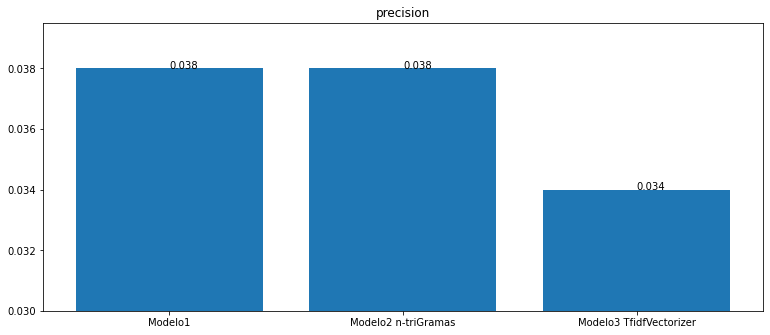

In [17]:
# Celda 5
import matplotlib.pyplot as plt

precisions = [modelo1, modelo2, modelo3]

fig, ax = plt.subplots(figsize = (10, 4))

ax = fig.add_axes([0,0,1,1])
ax.set_title("precision")
ejeX = ['Modelo1', 'Modelo2 n-triGramas','Modelo3 TfidfVectorizer']
ejeY = precisions
ejeY = [round(i,3) for i in ejeY]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.ylim(0.03, 0.0395)
plt.show()

Basados en los resultados presentados en la gráfica anterior, se encuentra que el modelo ajustado con la función TfidVectorizer presenta mejores resultados que los modelos ajustados con la metodología de conteos de cantidad de palabras (CountVectorizer). Lo anterior puede estar explicado debido a que ponderar las palabras que presentan importancia para cada observación hace que se ajuste los datos mejor al modelo, encontrando relaciones significativas para cada observación. Por último, es importante procesar los textos para evitar sobre ajuste en el modelo y sesgar los resultados, por ejemplo, es importante estandarizar las palabras tanto mayúsculas como minúsculas para evitar que están sean identificadas como dos casos diferentes ya que esto puede complicar el aprendizaje del modelo. Otro procesamiento que se le debe hacer a la base es eliminar los caracteres especiales o caracteres que no son propios del inglés como lo son la puntuación, signos, números, etc (Esto permite tener una información más limpia y un mejor ajuste). Además, se ignoraron los errores que pueden haber sido generados por un mal encouding, se puede observar en el ajuste de cada modelo usado en este ejercicio.